In [1]:
# Tran thi tham

# Report about analysis Cogis project


In [1]:
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import csv
from pandas import DataFrame
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
from pandas import Series
from math import sqrt


url1 = 'tbl_monitors_data_export.csv'
url2 = 'tbl_monitors_export.csv'
dataset = pandas.read_csv(url1)
dataset1= pandas.read_csv(url2)
print(dataset.shape)
print(dataset.describe())
print(dataset1.shape)
#Dataset for each id
numMax=dataset['monitor_id'].max()
for i in range(1,numMax+1):
    df=dataset.loc[dataset['monitor_id'] == i]
    print(df.describe())
    a=df.describe()
    print(dataset1.loc[dataset1['id']==i]['label'])
    print(dataset1.loc[dataset1['id']==1]['host_uri'])
    print("have speed: Mean=%f and std = %f "%(a.loc['mean']['result_float2'],a.loc['std']['result_float2']))
dataseta=dataset.loc[dataset['monitor_id'] == 1]
dataseta['result_float2'].plot(kind='box', subplots=True, layout=(2,2), sharex=False,sharey=False)
plt.show()
dataseta.hist(ax=plt.gca())
plt.show()
dataseta['result_float2'].plot()
plt.show()
autocorrelation_plot(dataseta['result_float2'])
plt.show()
#timegrouper
print(dataset['ts'])
print('id1')
print(dataseta['result_float2'].head())
print(dataseta.shape)
#try ARM
#create a differenced series
X=dataseta['result_float2'].values
size=int(len(X)*0.5)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order =(0,0,1))
    model_fit = model.fit(disp=0)
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs=test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' %error)
#plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()



Python: 3.6.6rc1 (v3.6.6rc1:1015e38be4, Jun 12 2018, 01:14:33) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
scipy: 1.3.0
numpy: 1.16.4
matplotlib: 3.1.1
pandas: 0.25.0
sklearn: 0.21.2
(48843, 10)
                 id    monitor_id  result_float1  result_float2
count  48843.000000  48843.000000   48843.000000   48843.000000
mean   24422.000000      2.930594       0.998035       1.089781
std    14099.903936      1.387413       0.062667       0.865915
min        1.000000      1.000000      -1.000000       0.000000
25%    12211.500000      2.000000       1.000000       0.965667
50%    24422.000000      3.000000       1.000000       1.037792
75%    36632.500000      4.000000       1.000000       1.243172
max    48843.000000      5.000000       1.000000      38.867926
(5, 16)
                 id  monitor_id  result_float1  result_float2
count  10099.000000     10099.0   10099.000000   10099.000000
mean   23695.954154         1.0       0.999406       1.146531
std    14366.894510    

<Figure size 640x480 with 4 Axes>

/Users/tham/mlearning/venv/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared


<Figure size 640x480 with 4 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

0        2019-07-17 07:46:09.623416
1        2019-07-17 07:46:10.155872
2        2019-07-17 07:46:11.212859
3        2019-07-17 07:46:12.503839
4        2019-07-17 07:51:20.186718
                    ...            
48838    2019-07-29 07:49:19.276173
48839    2019-07-29 07:49:20.460595
48840    2019-07-29 07:50:35.532051
48841    2019-07-29 07:50:54.558024
48842    2019-07-29 07:52:09.917307
Name: ts, Length: 48843, dtype: object
id1
0     1.047807
4     0.980852
5     0.989076
6     1.304401
16    0.992537
Name: result_float2, dtype: float64
(10099, 10)
predicted=1.164704, expected=1.010379
predicted=1.045343, expected=1.153393
predicted=1.155926, expected=1.079779
predicted=1.078293, expected=1.246603
predicted=1.181342, expected=1.088991
predicted=1.071487, expected=1.082641
predicted=1.115102, expected=1.403135
predicted=1.231846, expected=1.012424
predicted=1.017970, expected=1.083897
predicted=1.138218, expected=1.265934
predicted=1.164288, expected=1.267031
predicted=1.153795, 

predicted=1.083344, expected=1.243438
predicted=1.179861, expected=1.002189
predicted=1.037567, expected=1.396652
predicted=1.263709, expected=1.040380
predicted=1.018382, expected=1.050360
predicted=1.125903, expected=1.115391
predicted=1.108007, expected=1.311481
predicted=1.198175, expected=1.076210
predicted=1.061096, expected=1.194024
predicted=1.168469, expected=1.247752
predicted=1.145900, expected=1.002958
predicted=1.052280, expected=1.409252
predicted=1.262894, expected=1.160336
predicted=1.069357, expected=1.061036
predicted=1.109037, expected=1.160530
predicted=1.134239, expected=1.164473
predicted=1.125295, expected=1.408342
predicted=1.231832, expected=1.252546
predicted=1.121368, expected=1.079575
predicted=1.095035, expected=1.165539
predicted=1.142343, expected=1.326213
predicted=1.190132, expected=0.989923
predicted=1.028340, expected=1.067751
predicted=1.129255, expected=1.186909
predicted=1.136953, expected=1.269280
predicted=1.168434, expected=1.167876
predicted=1.

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.133813, expected=1.001131
predicted=1.056974, expected=1.323999
predicted=1.225356, expected=1.379431
predicted=1.177836, expected=1.121411
predicted=1.089182, expected=1.199221
predicted=1.159308, expected=1.315517
predicted=1.178792, expected=1.211294
predicted=1.126709, expected=1.191326
predicted=1.140250, expected=1.004888
predicted=1.056004, expected=1.432348
predicted=1.271576, expected=1.003289
predicted=1.000066, expected=1.195049
predicted=1.195183, expected=1.133268
predicted=1.086998, expected=1.005411
predicted=1.078693, expected=1.004175
predicted=1.081650, expected=1.006065
predicted=1.081180, expected=1.025123
predicted=1.089388, expected=1.252557
predicted=1.181739, expected=1.034586
predicted=1.051035, expected=1.393872
predicted=1.257439, expected=1.384571
predicted=1.166650, expected=1.180247
predicted=1.118850, expected=1.294025
predicted=1.186931, expected=1.333808
predicted=1.175055, expected=1.060963
predicted=1.065140, expected=1.014563
predicted=1.

predicted=1.065828, expected=1.168616
predicted=1.157956, expected=1.450281
predicted=1.237806, expected=1.016440
predicted=1.021543, expected=1.149824
predicted=1.168736, expected=1.165143
predicted=1.113233, expected=1.146142
predicted=1.128604, expected=1.002862
predicted=1.061798, expected=1.020545
predicted=1.097347, expected=1.286062
predicted=1.194185, expected=1.077746
predicted=1.065722, expected=1.029571
predicted=1.099504, expected=1.014779
predicted=1.079039, expected=1.415303
predicted=1.256309, expected=1.151691
predicted=1.070727, expected=1.109407
predicted=1.131046, expected=1.317494
predicted=1.193285, expected=1.162813
predicted=1.101982, expected=1.291978
predicted=1.194820, expected=1.415726
predicted=1.207886, expected=1.113599
predicted=1.075205, expected=1.499276
predicted=1.293475, expected=1.191044
predicted=1.071862, expected=1.165876
predicted=1.154561, expected=1.017912
predicted=1.057450, expected=1.075971
predicted=1.122759, expected=1.046209
predicted=1.

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.068148, expected=1.402303
predicted=1.256841, expected=1.243167
predicted=1.110521, expected=1.409945
predicted=1.242300, expected=1.270306
predicted=1.128135, expected=1.064733
predicted=1.089668, expected=1.195276
predicted=1.160789, expected=1.151671
predicted=1.112527, expected=1.159346
predicted=1.136069, expected=1.029626
predicted=1.071572, expected=1.194819
predicted=1.168222, expected=1.307830
predicted=1.175139, expected=1.043398
predicted=1.060963, expected=1.345815
predicted=1.236273, expected=1.405536
predicted=1.187693, expected=1.163808
predicted=1.106439, expected=1.240591
predicted=1.172952, expected=1.039396
predicted=1.060307, expected=1.008082
predicted=1.094506, expected=1.027479
predicted=1.088263, expected=1.492292
predicted=1.286512, expected=1.088432
predicted=1.033190, expected=1.012917
predicted=1.107976, expected=1.172757
predicted=1.143769, expected=1.199296
predicted=1.139891, expected=0.998619
predicted=1.057074, expected=1.400797
predicted=1.

predicted=1.206408, expected=1.009973
predicted=1.035631, expected=1.134684
predicted=1.159881, expected=1.254013
predicted=1.157835, expected=1.009851
predicted=1.056012, expected=1.150617
predicted=1.158021, expected=1.338749
predicted=1.194272, expected=1.181340
predicted=1.112852, expected=1.315841
predicted=1.203677, expected=1.149944
predicted=1.095735, expected=1.031310
predicted=1.091224, expected=6.191725
predicted=3.263837, expected=1.167147
predicted=0.242131, expected=1.391276
predicted=1.599744, expected=1.317924
predicted=1.001323, expected=1.134419
predicted=1.174988, expected=1.035734
predicted=1.060928, expected=1.015923
predicted=1.100379, expected=1.086330
predicted=1.113338, expected=1.024097
predicted=1.081831, expected=1.024810
predicted=1.095309, expected=1.270850
predicted=1.192732, expected=1.571170
predicted=1.277783, expected=1.277699
predicted=1.119283, expected=1.161963
predicted=1.137199, expected=1.016736
predicted=1.068857, expected=1.395173
predicted=1.

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.079494, expected=1.257603


/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.195160, expected=1.011596
predicted=1.043726, expected=1.083626
predicted=1.137273, expected=1.032416
predicted=1.076657, expected=1.396769
predicted=1.254613, expected=1.036519
predicted=1.029286, expected=1.578749
predicted=1.350672, expected=1.282154
predicted=1.092007, expected=1.003267
predicted=1.083522, expected=1.001678
predicted=1.086388, expected=1.157314
predicted=1.150346, expected=1.155815
predicted=1.122951, expected=1.156895
predicted=1.134877, expected=1.162208
predicted=1.132115, expected=1.318459
predicted=1.198712, expected=1.413434
predicted=1.210640, expected=1.140830
predicted=1.091534, expected=1.423565
predicted=1.259799, expected=1.325776
predicted=1.148459, expected=1.447584
predicted=1.246111, expected=1.212760
predicted=1.106948, expected=1.129063
predicted=1.130168, expected=1.235041
predicted=1.164830, expected=1.159246
predicted=1.118598, expected=1.253108
predicted=1.177264, expected=1.003711
predicted=1.048287, expected=1.247949
predicted=1.

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.062333, expected=1.446065
predicted=1.281839, expected=1.074812
predicted=1.034600, expected=1.013585
predicted=1.112426, expected=1.329411
predicted=1.212062, expected=1.406723
predicted=1.202767, expected=1.012500
predicted=1.041657, expected=1.028535
predicted=1.115777, expected=1.211851
predicted=1.161490, expected=1.030286
predicted=1.066359, expected=1.211444
predicted=1.182000, expected=1.027607
predicted=1.056655, expected=1.159975
predicted=1.164512, expected=1.119630
predicted=1.102491, expected=1.429607
predicted=1.258217, expected=1.266490
predicted=1.124809, expected=1.365750
predicted=1.222217, expected=1.284156
predicted=1.147334, expected=1.134782
predicted=1.116163, expected=1.550059
predicted=1.303065, expected=1.334117
predicted=1.134514, expected=1.331411
predicted=1.203951, expected=1.025895
predicted=1.047025, expected=1.197217
predicted=1.184401, expected=1.019092
predicted=1.052357, expected=1.246785
predicted=1.202915, expected=1.286688
predicted=1.

predicted=1.090156, expected=1.150893
predicted=1.147806, expected=1.224922
predicted=1.154674, expected=0.996355
predicted=1.056165, expected=1.007790
predicted=1.102140, expected=1.198360
predicted=1.162641, expected=1.037595
predicted=1.070065, expected=1.237746
predicted=1.192539, expected=1.167897
predicted=1.112092, expected=1.053488
predicted=1.097874, expected=1.006679
predicted=1.084222, expected=1.038986
predicted=1.103435, expected=1.118213
predicted=1.128540, expected=1.039835
predicted=1.085237, expected=1.300273
predicted=1.212328, expected=1.009260
predicted=1.037409, expected=1.155916
predicted=1.171933, expected=1.086663
predicted=1.086685, expected=1.070310
predicted=1.115497, expected=1.167837
predicted=1.144249, expected=1.025968
predicted=1.072860, expected=1.240894
predicted=1.192647, expected=1.133656
predicted=1.097682, expected=1.402348
predicted=1.249846, expected=1.161078
predicted=1.085278, expected=1.257449
predicted=1.194449, expected=1.220056
predicted=1.

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.086779, expected=1.088683
predicted=1.123304, expected=1.313739
predicted=1.202195, expected=1.293732
predicted=1.160853, expected=1.367945
predicted=1.209228, expected=1.075991
predicted=1.066863, expected=1.245276
predicted=1.197242, expected=1.175214
predicted=1.113408, expected=1.124147
predicted=1.127114, expected=1.296904
predicted=1.193671, expected=1.092016
predicted=1.080124, expected=1.550926
predicted=1.319639, expected=1.148022
predicted=1.050935, expected=1.195254
predicted=1.183090, expected=1.037800
predicted=1.061945, expected=1.008501
predicted=1.100342, expected=1.253964
predicted=1.186971, expected=1.207583
predicted=1.131351, expected=1.144028
predicted=1.128035, expected=1.009204
predicted=1.073012, expected=1.031943
predicted=1.105523, expected=1.253997
predicted=1.184823, expected=1.003330
predicted=1.046791, expected=1.120839
predicted=1.153674, expected=1.049438
predicted=1.079094, expected=1.127044
predicted=1.142748, expected=1.005997
predicted=1.

predicted=1.143594, expected=1.052647
predicted=1.086823, expected=1.027723
predicted=1.100078, expected=1.047937
predicted=1.102967, expected=1.179748
predicted=1.156697, expected=1.029469
predicted=1.071672, expected=1.182495
predicted=1.170875, expected=1.177749
predicted=1.127568, expected=1.334856
predicted=1.211111, expected=1.260692
predicted=1.145416, expected=1.068443
predicted=1.092674, expected=1.023176
predicted=1.095773, expected=1.033796
predicted=1.098893, expected=1.166005
predicted=1.152690, expected=1.023504
predicted=1.070879, expected=1.220065
predicted=1.186889, expected=1.406638
predicted=1.216335, expected=1.178766
predicted=1.109120, expected=1.261011
predicted=1.188087, expected=1.352241
predicted=1.193232, expected=1.025382
predicted=1.054872, expected=1.264054
predicted=1.211999, expected=1.165206
predicted=1.105343, expected=1.377041
predicted=1.238092, expected=1.491329
predicted=1.230456, expected=1.058275
predicted=1.053178, expected=1.204708
predicted=1.

predicted=1.124521, expected=1.047743
predicted=1.094286, expected=1.287230
predicted=1.206679, expected=1.199773
predicted=1.123430, expected=1.339033
predicted=1.216160, expected=1.138666
predicted=1.094056, expected=1.019177
predicted=1.095130, expected=1.329262
predicted=1.223896, expected=1.011818
predicted=1.037986, expected=1.414179
predicted=1.283097, expected=1.071131
predicted=1.038072, expected=1.104856
predicted=1.154188, expected=1.271377
predicted=1.175208, expected=1.264268
predicted=1.163510, expected=1.258229
predicted=1.165887, expected=1.330071
predicted=1.194855, expected=1.243222
predicted=1.146625, expected=1.327120
predicted=1.201696, expected=1.382540
predicted=1.201879, expected=1.282182
predicted=1.160018, expected=1.039255
predicted=1.076243, expected=1.207592
predicted=1.181281, expected=1.169306
predicted=1.121581, expected=1.333560
predicted=1.214907, expected=1.207933
predicted=1.123707, expected=1.225416
predicted=1.168997, expected=1.268202
predicted=1.

predicted=1.080720, expected=1.039924
predicted=1.110994, expected=1.049068
predicted=1.102187, expected=0.996904
predicted=1.084119, expected=1.240424
predicted=1.193032, expected=1.104845
predicted=1.091250, expected=1.254692
predicted=1.196017, expected=1.129819
predicted=1.100421, expected=1.080335
predicted=1.119610, expected=1.113970
predicted=1.125622, expected=1.180224
predicted=1.150707, expected=1.025856
predicted=1.075989, expected=1.238740
predicted=1.195729, expected=1.016920
predicted=1.053529, expected=1.209282
predicted=1.192809, expected=1.151469
predicted=1.110769, expected=1.083552
predicted=1.116642, expected=1.076032
predicted=1.111060, expected=1.426441
predicted=1.259290, expected=1.037222
predicted=1.035556, expected=1.032356
predicted=1.126648, expected=1.077839
predicted=1.107655, expected=1.244673
predicted=1.185024, expected=1.392611
predicted=1.214437, expected=1.174876
predicted=1.111565, expected=1.000104
predicted=1.081618, expected=1.305759
predicted=1.

predicted=1.130192, expected=1.353684
predicted=1.222604, expected=1.036222
predicted=1.052025, expected=1.064307
predicted=1.134688, expected=1.100467
predicted=1.115332, expected=1.048244
predicted=1.101644, expected=1.319766
predicted=1.220358, expected=1.074105
predicted=1.068719, expected=1.397954
predicted=1.266621, expected=1.281510
predicted=1.135834, expected=1.252341
predicted=1.178137, expected=1.397266
predicted=1.220878, expected=1.079366
predicted=1.070797, expected=1.403499
predicted=1.268167, expected=1.145018
predicted=1.078481, expected=1.232113
predicted=1.193666, expected=1.021221
predicted=1.057968, expected=1.015791
predicted=1.112158, expected=0.994771
predicted=1.080844, expected=1.080009
predicted=1.129335, expected=0.999195
predicted=1.075512, expected=1.108974
predicted=1.143585, expected=1.199689
predicted=1.153017, expected=1.098169
predicted=1.106844, expected=1.006456
predicted=1.087878, expected=1.078761
predicted=1.125850, expected=1.188144
predicted=1.

predicted=1.033392, expected=1.343799
predicted=1.260125, expected=1.244435
predicted=1.124540, expected=1.368770
predicted=1.232653, expected=1.225449
predicted=1.128113, expected=1.443244
predicted=1.262189, expected=1.121824
predicted=1.072783, expected=1.319504
predicted=1.233762, expected=1.332348
predicted=1.172193, expected=1.245540
predicted=1.161714, expected=1.151641
predicted=1.127030, expected=1.255968
predicted=1.184849, expected=1.408241
predicted=1.224162, expected=1.007587
predicted=1.041201, expected=1.168766
predicted=1.184303, expected=1.190224
predicted=1.133730, expected=1.301419
predicted=1.201017, expected=1.233956
predicted=1.145001, expected=1.106156
predicted=1.115149, expected=1.189636
predicted=1.162281, expected=1.041584
predicted=1.081110, expected=1.166892
predicted=1.166970, expected=1.236436
predicted=1.160200, expected=1.214471
predicted=1.153893, expected=1.350412
predicted=1.213070, expected=1.376265
predicted=1.199246, expected=1.001526
predicted=1.

predicted=1.151079, expected=1.317581
predicted=1.201648, expected=1.023257
predicted=1.058745, expected=1.169796
predicted=1.178664, expected=1.025479
predicted=1.069180, expected=1.366669
predicted=1.255918, expected=1.005542
predicted=1.028934, expected=1.233626
predicted=1.217465, expected=1.154606
predicted=1.106633, expected=1.148144
predicted=1.149871, expected=1.380834
predicted=1.228387, expected=1.231439
predicted=1.133984, expected=1.047029
predicted=1.096686, expected=1.191114
predicted=1.171834, expected=1.180372
predicted=1.136259, expected=1.031399
predicted=1.089269, expected=1.348979
predicted=1.240326, expected=1.021345
predicted=1.042009, expected=1.219173
predicted=1.206124, expected=1.239016
predicted=1.146373, expected=1.134828
predicted=1.127965, expected=1.286881
predicted=1.198599, expected=1.244098
predicted=1.151630, expected=1.195539
predicted=1.150980, expected=1.065044
predicted=1.097182, expected=1.018055
predicted=1.099988, expected=1.190075
predicted=1.

predicted=1.105342, expected=1.180831
predicted=1.164984, expected=1.408337
predicted=1.234530, expected=1.244580
predicted=1.137935, expected=1.179761
predicted=1.151099, expected=1.417561
predicted=1.244155, expected=1.288276
predicted=1.152105, expected=1.301589
predicted=1.195756, expected=1.242316
predicted=1.153149, expected=1.081394
predicted=1.104149, expected=1.060993
predicted=1.115982, expected=1.063154
predicted=1.111968, expected=1.394150
predicted=1.250727, expected=1.007946
predicted=1.033329, expected=1.319354
predicted=1.252319, expected=1.348814
predicted=1.173867, expected=1.080406
predicted=1.095204, expected=1.077793
predicted=1.126688, expected=1.054747
predicted=1.104098, expected=1.405021
predicted=1.258528, expected=1.261010
predicted=1.134965, expected=1.207186
predicted=1.163852, expected=1.389926
predicted=1.227592, expected=1.053231
predicted=1.061770, expected=1.150436
predicted=1.170686, expected=1.508107
predicted=1.273738, expected=1.253321
predicted=1.

predicted=1.241095, expected=1.070494
predicted=1.064444, expected=1.002805
predicted=1.109510, expected=1.134350
predicted=1.145291, expected=1.272370
predicted=1.187609, expected=1.218970
predicted=1.148016, expected=1.192313
predicted=1.153375, expected=1.006343
predicted=1.074196, expected=1.030599
predicted=1.116980, expected=1.042243
predicted=1.104085, expected=1.005352
predicted=1.094140, expected=1.143318
predicted=1.155340, expected=1.009407
predicted=1.074597, expected=1.068352
predicted=1.132385, expected=1.166562
predicted=1.149114, expected=1.085875
predicted=1.108801, expected=1.138510
predicted=1.147259, expected=1.173299
predicted=1.145746, expected=1.547375
predicted=1.301197, expected=1.071201
predicted=1.039856, expected=1.170954
predicted=1.189258, expected=1.118507
predicted=1.105745, expected=1.409898
predicted=1.260887, expected=1.066082
predicted=1.054448, expected=1.075584
predicted=1.143779, expected=1.005432
predicted=1.077782, expected=1.406331
predicted=1.

predicted=1.142966, expected=1.150285
predicted=1.138803, expected=1.037906
predicted=1.094035, expected=1.328002
predicted=1.232552, expected=1.010833
predicted=1.044075, expected=1.195235
predicted=1.198294, expected=1.403307
predicted=1.220599, expected=1.404799
predicted=1.212024, expected=1.174613
predicted=1.120376, expected=1.409424
predicted=1.255424, expected=1.076075
predicted=1.061701, expected=1.008770
predicted=1.113968, expected=1.203707
predicted=1.172980, expected=1.182864
predicted=1.139960, expected=1.149095
predicted=1.139651, expected=1.152361
predicted=1.141132, expected=1.314991
predicted=1.207800, expected=1.062897
predicted=1.075961, expected=1.065839
predicted=1.131694, expected=1.006026
predicted=1.083892, expected=1.159773
predicted=1.167249, expected=1.179001
predicted=1.140732, expected=1.351780
predicted=1.223180, expected=1.370025
predicted=1.196656, expected=1.046401
predicted=1.073774, expected=1.240398
predicted=1.204837, expected=1.174967
predicted=1.

predicted=1.224665, expected=1.017671
predicted=1.051567, expected=1.267924
predicted=1.226491, expected=1.260234
predicted=1.151058, expected=1.159425
predicted=1.140577, expected=1.209770
predicted=1.165716, expected=1.028472
predicted=1.080413, expected=1.039325
predicted=1.120129, expected=1.141031
predicted=1.145741, expected=1.421069
predicted=1.250892, expected=1.142940
predicted=1.092538, expected=1.116718
predicted=1.147126, expected=1.027035
predicted=1.087508, expected=1.222841
predicted=1.193046, expected=1.158318
predicted=1.122788, expected=1.006644
predicted=1.089136, expected=1.168058
predicted=1.169731, expected=1.158889
predicted=1.132647, expected=1.036036
predicted=1.097200, expected=1.213744
predicted=1.185274, expected=1.193475
predicted=1.140519, expected=1.163129
predicted=1.146475, expected=1.079996
predicted=1.109661, expected=1.180567
predicted=1.166427, expected=1.077519
predicted=1.100393, expected=1.000784
predicted=1.095956, expected=1.014727
predicted=1.

predicted=1.098145, expected=1.009166
predicted=1.101514, expected=0.999677
predicted=1.096187, expected=1.037218
predicted=1.113882, expected=1.202806
predicted=1.174977, expected=1.118427
predicted=1.114887, expected=1.258166
predicted=1.197440, expected=1.048099
predicted=1.076563, expected=1.220076
predicted=1.197535, expected=1.014641
predicted=1.062701, expected=1.151835
predicted=1.175060, expected=1.366091
predicted=1.217175, expected=1.326492
predicted=1.183445, expected=1.248039
predicted=1.164985, expected=1.044217
predicted=1.088412, expected=1.292970
predicted=1.222802, expected=1.043122
predicted=1.064087, expected=1.223305
predicted=1.204072, expected=1.146425
predicted=1.114501, expected=1.216112
predicted=1.180288, expected=1.158942
predicted=1.129506, expected=1.307745
predicted=1.211959, expected=1.302794
predicted=1.175877, expected=1.084677
predicted=1.100686, expected=1.237224
predicted=1.194759, expected=1.328209
predicted=1.193506, expected=1.167276
predicted=1.

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.105617, expected=1.192903
predicted=1.174464, expected=1.019677
predicted=1.074469, expected=1.272850
predicted=1.220349, expected=1.166432
predicted=1.116149, expected=1.180233
predicted=1.164890, expected=1.239018
predicted=1.169050, expected=1.042902
predicted=1.086322, expected=1.294421
predicted=1.224388, expected=1.447639
predicted=1.230682, expected=1.019717
predicted=1.051330, expected=1.411070
predicted=1.287068, expected=1.956109
predicted=1.414920, expected=1.077753
predicted=0.999323, expected=1.158168
predicted=1.204184, expected=1.404484
predicted=1.221338, expected=1.283332
predicted=1.164232, expected=0.996211
predicted=1.069214, expected=1.155750
predicted=1.174354, expected=1.232142
predicted=1.162492, expected=1.180480
predicted=1.146058, expected=1.128062
predicted=1.131194, expected=1.218315
predicted=1.174619, expected=6.334427
predicted=3.270592, expected=1.082499
predicted=0.240147, expected=1.084882
predicted=1.486272, expected=1.071841
predicted=0.

predicted=1.077227, expected=1.331354
predicted=1.244397, expected=1.540572
predicted=1.261737, expected=1.115263
predicted=1.079676, expected=1.009652
predicted=1.111105, expected=1.004898
predicted=1.096208, expected=1.244157
predicted=1.200752, expected=1.374113
predicted=1.211230, expected=1.092196
predicted=1.090965, expected=1.163404
predicted=1.169719, expected=1.155151
predicted=1.133935, expected=1.206511
predicted=1.169784, expected=1.328963
predicted=1.205425, expected=1.168245
predicted=1.124666, expected=1.007546
predicted=1.091772, expected=1.164515
predicted=1.169865, expected=1.417675
predicted=1.241900, expected=1.118461
predicted=1.089205, expected=1.243184
predicted=1.203316, expected=1.272788
predicted=1.168574, expected=1.254805
predicted=1.175479, expected=1.106749
predicted=1.111741, expected=1.158158
predicted=1.159102, expected=1.013631
predicted=1.080167, expected=1.207321
predicted=1.192302, expected=1.159120
predicted=1.126360, expected=1.163846
predicted=1.

predicted=1.338586, expected=1.521708
predicted=1.216348, expected=1.252663
predicted=1.156010, expected=1.457383
predicted=1.265011, expected=1.049411
predicted=1.052472, expected=1.027155
predicted=1.130685, expected=1.282850
predicted=1.203663, expected=1.071623
predicted=1.086818, expected=1.252290
predicted=1.209137, expected=1.166132
predicted=1.123436, expected=1.319023
predicted=1.221539, expected=1.046614
predicted=1.069215, expected=1.004449
predicted=1.114485, expected=1.171693
predicted=1.164630, expected=1.121386
predicted=1.123333, expected=1.004030
predicted=1.092051, expected=1.200489
predicted=1.185680, expected=1.320278
predicted=1.196454, expected=1.231163
predicted=1.155400, expected=1.209159
predicted=1.163239, expected=1.110402
predicted=1.119415, expected=1.083993
predicted=1.126567, expected=1.150995
predicted=1.151172, expected=1.092440
predicted=1.116980, expected=1.041737
predicted=1.110182, expected=1.209376
predicted=1.181900, expected=1.039780
predicted=1.

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.173991, expected=1.407347
predicted=1.237097, expected=1.004106
predicted=1.045374, expected=1.051634
predicted=1.143716, expected=1.328839
predicted=1.217265, expected=1.025849
predicted=1.062463, expected=1.282983
predicted=1.231817, expected=1.215857
predicted=1.134614, expected=1.380734
predicted=1.242373, expected=1.367733
predicted=1.192756, expected=1.186444
predicted=1.138634, expected=1.429049
predicted=1.260643, expected=1.500804
predicted=1.240024, expected=1.038420
predicted=1.058412, expected=1.260264
predicted=1.224277, expected=1.003692
predicted=1.050610, expected=1.215906
predicted=1.209240, expected=0.999033
predicted=1.054872, expected=1.542666
predicted=1.341823, expected=1.159770
predicted=1.066497, expected=1.336794
predicted=1.252439, expected=1.219146
predicted=1.127669, expected=0.999420
predicted=1.088625, expected=2.385313
predicted=1.674430, expected=1.157619
predicted=0.929125, expected=1.111978
predicted=1.216601, expected=1.083537
predicted=1.

predicted=1.174240, expected=1.190280
predicted=1.150236, expected=1.399672
predicted=1.245917, expected=1.083676
predicted=1.077192, expected=1.120494
predicted=1.161427, expected=1.297192
predicted=1.199337, expected=1.254699
predicted=1.166397, expected=1.245914
predicted=1.176308, expected=0.996697
predicted=1.070093, expected=1.298263
predicted=1.237229, expected=1.036014
predicted=1.061247, expected=1.009059
predicted=1.122307, expected=1.269759
predicted=1.204137, expected=1.154356
predicted=1.123307, expected=1.090016
predicted=1.130060, expected=1.038476
predicted=1.106159, expected=1.321633
predicted=1.232017, expected=1.090647
predicted=1.085769, expected=1.007849
predicted=1.111758, expected=1.357126
predicted=1.244270, expected=1.236804


/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.140663, expected=1.159947
predicted=1.151628, expected=1.052442
predicted=1.103067, expected=1.007222
predicted=1.104422, expected=1.002138
predicted=1.101768, expected=1.234439
predicted=1.198067, expected=1.191986
predicted=1.141208, expected=1.404128
predicted=1.251477, expected=1.439910
predicted=1.220983, expected=1.040376
predicted=1.069731, expected=1.322974
predicted=1.247550, expected=1.443944
predicted=1.224285, expected=1.384894
predicted=1.209645, expected=1.191134
predicted=1.136242, expected=1.111477
predicted=1.133676, expected=1.273108
predicted=1.200982, expected=1.071386
predicted=1.090720, expected=1.021568
predicted=1.115478, expected=1.038430
predicted=1.112231, expected=1.073668
predicted=1.127996, expected=1.370774
predicted=1.243320, expected=1.263440
predicted=1.152082, expected=1.154591
predicted=1.144866, expected=1.169105
predicted=1.153774, expected=1.078899
predicted=1.113148, expected=1.099122
predicted=1.138080, expected=1.372837
predicted=1.

/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.103400, expected=1.399264
predicted=1.265408, expected=1.214511
predicted=1.123343, expected=1.390097
predicted=1.253512, expected=1.160688
predicted=1.106194, expected=1.144926
predicted=1.160092, expected=1.113692
predicted=1.125210, expected=1.103240
predicted=1.135215, expected=1.359906
predicted=1.236295, expected=1.151694
predicted=1.109578, expected=1.250522
predicted=1.201994, expected=1.069428
predicted=1.089931, expected=1.269388
predicted=1.217777, expected=1.011135
predicted=1.059584, expected=1.460976
predicted=1.308712, expected=1.148584
predicted=1.078678, expected=1.353272
predicted=1.256783, expected=1.197500
predicted=1.120017, expected=1.004956
predicted=1.097153, expected=1.017273
predicted=1.111551, expected=1.289374
predicted=1.217135, expected=1.279921
predicted=1.170024, expected=1.189049
predicted=1.152102, expected=1.080202
predicted=1.114847, expected=1.341835
predicted=1.237308, expected=1.033443
predicted=1.060799, expected=1.219141
predicted=1.

predicted=1.168996, expected=1.160348
predicted=1.142135, expected=1.394902
predicted=1.249172, expected=1.111909
predicted=1.089508, expected=1.082545
predicted=1.142840, expected=1.447466
predicted=1.270422, expected=1.096780
predicted=1.074636, expected=1.379754
predicted=1.270637, expected=1.174109
predicted=1.106230, expected=1.154065
predicted=1.165324, expected=1.346640
predicted=1.219984, expected=1.083103
predicted=1.089727, expected=1.157469
predicted=1.173488, expected=1.170014
predicted=1.144339, expected=1.235465
predicted=1.183072, expected=1.081004
predicted=1.103984, expected=1.549065
predicted=1.327990, expected=1.110569
predicted=1.056809, expected=1.170297
predicted=1.192255, expected=1.152009
predicted=1.129331, expected=1.166337
predicted=1.160953, expected=1.315297
predicted=1.208999, expected=1.174829
predicted=1.131840, expected=1.177980
predicted=1.164716, expected=1.366395
predicted=1.228402, expected=1.188245
predicted=1.129419, expected=1.048314
predicted=1.

predicted=1.131386, expected=1.092575
predicted=1.130507, expected=0.980848


/Users/tham/mlearning/venv/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.085121, expected=1.052789
predicted=1.133133, expected=1.204559
predicted=1.175606, expected=1.056762
predicted=1.097721, expected=1.284370
predicted=1.222769, expected=1.374320
predicted=1.208427, expected=1.132209
predicted=1.115202, expected=1.047065
predicted=1.118500, expected=1.330297
predicted=1.233093, expected=1.347039
predicted=1.193063, expected=1.412591
predicted=1.236304, expected=0.970567
predicted=1.037672, expected=1.346322
predicted=1.272777, expected=1.169112
predicted=1.104031, expected=0.980863
predicted=1.096031, expected=1.288990
predicted=1.225428, expected=1.001254
predicted=1.054692, expected=1.164685
predicted=1.191459, expected=1.087557
predicted=1.103913, expected=1.165437
predicted=1.171618, expected=1.132860
predicted=1.130575, expected=1.107309
predicted=1.136911, expected=1.372514
predicted=1.242879, expected=0.989431
predicted=1.042714, expected=1.261069
predicted=1.235812, expected=1.137163
predicted=1.106079, expected=1.389788
predicted=1.

<Figure size 640x480 with 1 Axes>

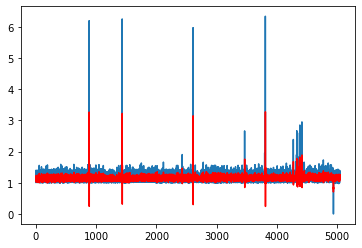

In [2]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

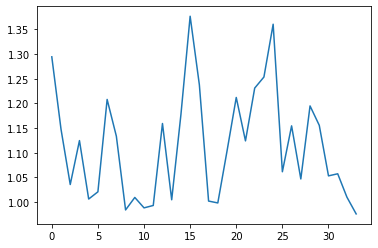

In [12]:
plt.plot(test)

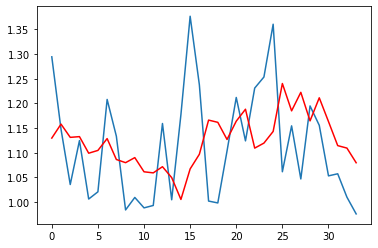

In [13]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()